In [ ]:
!pip install opendatasets --quiet

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od
import os

In [ ]:
od.download('https://www.kaggle.com/datasets/vetrirah/customer')

Dataset URL: https://www.kaggle.com/datasets/vetrirah/customer


100%|██████████| 105k/105k [00:00<00:00, 30.1MB/s]

In [ ]:
os.listdir('customer')

['sample_submission.csv', 'Test.csv', 'Train.csv']

In [ ]:
train_df = pd.read_csv('customer/Train.csv')
test_df = pd.read_csv('customer/Test.csv')
submission_df = pd.read_csv('customer/sample_submission.csv')

In [ ]:
train_df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [ ]:
train_df.drop(columns = "ID", inplace = True)

In [ ]:
test_df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [ ]:
test_df.drop(columns = "ID", inplace = True)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   object 
 1   Ever_Married     7928 non-null   object 
 2   Age              8068 non-null   int64  
 3   Graduated        7990 non-null   object 
 4   Profession       7944 non-null   object 
 5   Work_Experience  7239 non-null   float64
 6   Spending_Score   8068 non-null   object 
 7   Family_Size      7733 non-null   float64
 8   Var_1            7992 non-null   object 
 9   Segmentation     8068 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 630.4+ KB


# Data Cleaning

In [ ]:
train_df.isna().sum()

,0
Gender,0
Ever_Married,140
Age,0
Graduated,78
Profession,124
Work_Experience,829
Spending_Score,0
Family_Size,335
Var_1,76
Segmentation,0


In [ ]:
test_df.isna().sum()

,0
Gender,0
Ever_Married,50
Age,0
Graduated,24
Profession,38
Work_Experience,269
Spending_Score,0
Family_Size,113
Var_1,32


In [ ]:
train_df.dropna(subset=['Ever_Married', 'Graduated', 'Profession', 'Var_1'], inplace=True)

In [ ]:
train_df.isna().sum()

,0
Gender,0
Ever_Married,0
Age,0
Graduated,0
Profession,0
Work_Experience,764
Spending_Score,0
Family_Size,293
Var_1,0
Segmentation,0


In [ ]:
test_df.dropna(subset=['Ever_Married', 'Graduated', 'Profession', 'Var_1'], inplace=True)

In [ ]:
train_df.fillna(train_df.select_dtypes(include='number').mean(), inplace=True)

In [ ]:
test_df.fillna(train_df.select_dtypes(include='number').mean(), inplace=True)

In [ ]:
train_df.isna().sum()

,0
Gender,0
Ever_Married,0
Age,0
Graduated,0
Profession,0
Work_Experience,0
Spending_Score,0
Family_Size,0
Var_1,0
Segmentation,0


In [ ]:
test_df.isna().sum()

,0
Gender,0
Ever_Married,0
Age,0
Graduated,0
Profession,0
Work_Experience,0
Spending_Score,0
Family_Size,0
Var_1,0


# EDA

In [28]:
import plotly.express as px

**Age**

<Axes: xlabel='Age', ylabel='Count'>

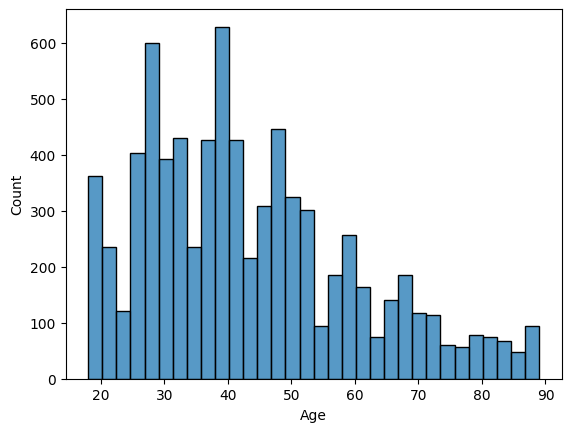

In [29]:
sns.histplot(train_df['Age'])

In [30]:
fig = px.histogram(train_df, x='Age', color='Segmentation')
fig.show()

Here are where most age groups fall for each segmentation:

A: 30-40

B: 40-50

C: 40-50-60

D: 20-30

It looks A,B,C are mostly adults above the age of 20, whereas D has significantly more 20 to 30 year olds or young adults.

**Relationships**

In [31]:
fig = px.histogram(train_df, x='Ever_Married', color='Segmentation')
fig.show()

A: Ever Married > Non Married

B: Ever Married > Non Married

C: Ever Married > Non Married

D: Non Married > Ever Married


D is the only group where non married are higher then married, which can be explained given the age devide, 20 to 30 year olds are less lilely to be married compared to the rest of the age groups.

So it could be that D represents more so younger customer.

<Axes: xlabel='Ever_Married', ylabel='Count'>

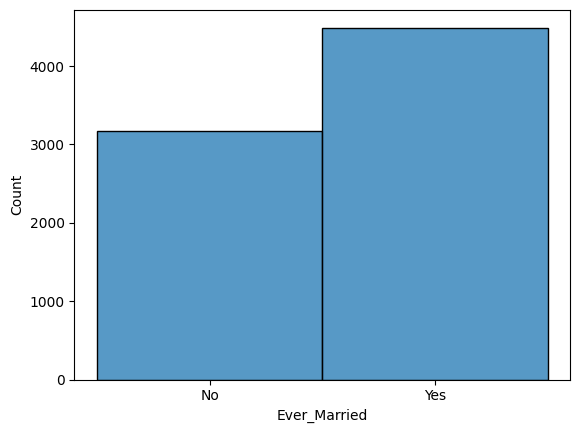

In [33]:
sns.histplot(train_df['Ever_Married'])

It looks like there more customer who have been married then not which explains the segmentation in the previous paragraph.

In [53]:
fig = px.histogram(train_df, x='Gender', color='Ever_Married')
fig.show()

Male: Ever Married > Non Married

Female: Ever Married > Non Married. Here is less difference compared to the male population

<Axes: xlabel='Gender', ylabel='Count'>

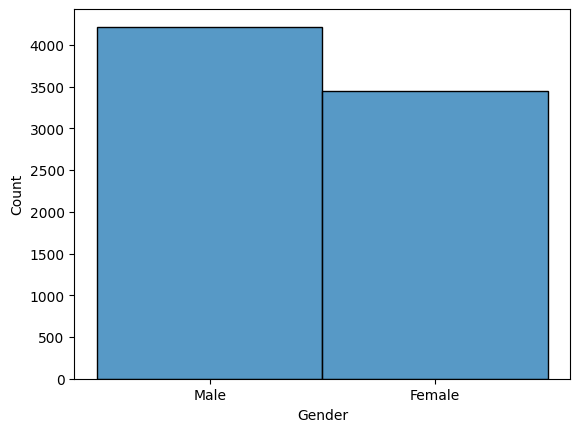

In [55]:
sns.histplot(train_df['Gender'])

In [54]:
fig = px.histogram(train_df, x='Gender', color='Segmentation')
fig.show()

A: Male > Female

B: Male > Female

C: Male > Female

D: Male > Female

The difference is not that high which reflects that the sample had more males then females.

**Work**

<Axes: xlabel='Work_Experience', ylabel='Count'>

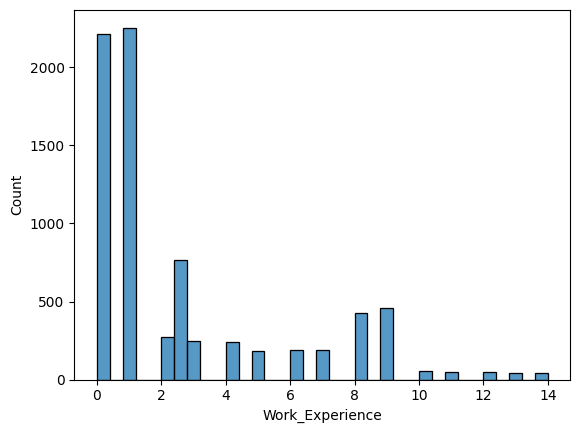

In [34]:
sns.histplot(train_df['Work_Experience'])

Interenstingly it looks like most people do not have work experience, let's check profession distribution.

In [41]:
plt.figure(figsize=(30, 10))

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

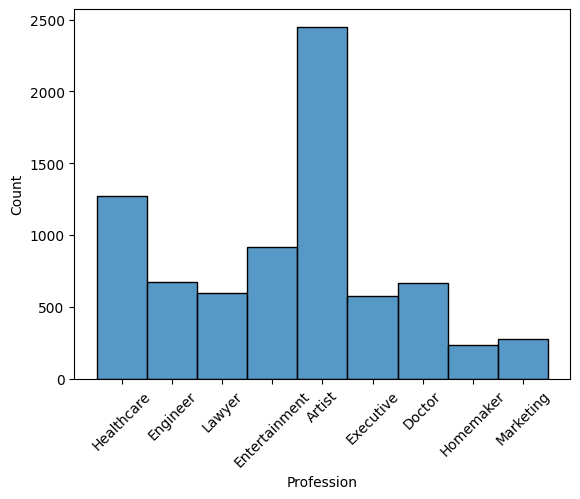

In [48]:
plt.xticks(rotation=45)
sns.histplot(train_df['Profession'])
plt.show()

There are a lot of Artists compared to other professions

In [51]:
fig = px.histogram(train_df, x='Profession', color='Segmentation')
fig.show()

All segments have significantly more Artists then the other professions except D which has more those in Healthcare.

In [68]:
fig = px.histogram(train_df, x='Graduated', color='Segmentation')
fig.show()

A: yes > no

B: yes > no

C: yes > no. More yes's then A and B

D: no > yes. Could be since most are still young and in college.


In [65]:
fig = px.histogram(train_df, x='Spending_Score', color='Segmentation')
fig.show()

A: Low > Average > High

B: Low > Average > High. More average scores then A

C: Average > Low > High

D: Low > High > Average. Signifcanlty more low spending scores then the rest with Hogh and Aeverage close.

In [67]:
fig = px.histogram(train_df, x='Var_1', color='Segmentation')
fig.show()

***What was learned so far?***

It seems D is different then the others, it includes mostly younger customer who are not married, and work in healthcare. Whereas the rest of the segments somewhat overlap and are not as clear.

# Correlation Analysis

In [62]:
numeric_cols = train_df.select_dtypes(include='number').columns

In [57]:
numeric_cols

Index(['Age', 'Work_Experience', 'Family_Size'], dtype='object')

In [58]:
train_df[numeric_cols].corr()

,Age,Work_Experience,Family_Size
Age,1.000000,-0.180334,-0.274719
Work_Experience,-0.180334,1.000000,-0.064337
Family_Size,-0.274719,-0.064337,1.000000


In [63]:
categorical_cols = train_df.select_dtypes(include='object').columns

In [64]:
categorical_cols

Index(['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score',
       'Var_1', 'Segmentation'],
      dtype='object')

In [66]:
categorical_cols = categorical_cols.drop('Segmentation')

# Preparing Data

**Categorical Features**

In [69]:
train_df['Gender'] = train_df['Gender'].map({'Male': 0, 'Female': 1})
train_df['Ever_Married'] = train_df['Ever_Married'].map({'No': 0, 'Yes': 1})
train_df['Graduated'] = train_df['Graduated'].map({'No': 0, 'Yes': 1})
train_df['Spending_Score'] = train_df['Spending_Score'].map({'Low': 0, 'Average': 1, 'High': 2})

In [70]:
train_df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,0,22,0,Healthcare,1.000000,0,4.0,Cat_4,D
1,1,1,38,1,Engineer,2.636206,1,3.0,Cat_4,A
2,1,1,67,1,Engineer,1.000000,0,1.0,Cat_6,B
3,0,1,67,1,Lawyer,0.000000,2,2.0,Cat_6,B
4,1,1,40,1,Entertainment,2.636206,2,6.0,Cat_6,A


In [71]:
train_df = pd.get_dummies(train_df, columns=['Profession'])

In [72]:
train_df.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,0,0,22,0,1.000000,0,4.0,Cat_4,D,False,False,False,False,False,True,False,False,False
1,1,1,38,1,2.636206,1,3.0,Cat_4,A,False,False,True,False,False,False,False,False,False
2,1,1,67,1,1.000000,0,1.0,Cat_6,B,False,False,True,False,False,False,False,False,False
3,0,1,67,1,0.000000,2,2.0,Cat_6,B,False,False,False,False,False,False,False,True,False
4,1,1,40,1,2.636206,2,6.0,Cat_6,A,False,False,False,True,False,False,False,False,False


In [73]:
train_df = pd.get_dummies(train_df, columns=['Var_1'])

In [74]:
train_df

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation,Profession_Artist,Profession_Doctor,...,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,0,0,22,0,1.000000,0,4.0,D,False,False,...,False,False,False,False,False,False,True,False,False,False
1,1,1,38,1,2.636206,1,3.0,A,False,False,...,False,False,False,False,False,False,True,False,False,False
2,1,1,67,1,1.000000,0,1.0,B,False,False,...,False,False,False,False,False,False,False,False,True,False
3,0,1,67,1,0.000000,2,2.0,B,False,False,...,False,True,False,False,False,False,False,False,True,False
4,1,1,40,1,2.636206,2,6.0,A,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8062,0,1,41,1,0.000000,2,5.0,B,True,False,...,False,False,False,False,False,False,False,False,True,False
8064,0,0,35,0,3.000000,0,4.0,D,False,False,...,False,False,False,False,False,False,True,False,False,False
8065,1,0,33,1,1.000000,0,1.0,D,False,False,...,False,False,False,False,False,False,False,False,True,False
8066,1,0,27,1,1.000000,0,4.0,B,False,False,...,False,False,False,False,False,False,False,False,True,False


In [76]:
train_df = train_df.astype({col: 'int' for col in train_df.select_dtypes('bool').columns})

In [77]:
train_df.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation,Profession_Artist,Profession_Doctor,...,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,0,0,22,0,1.000000,0,4.0,D,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,1,38,1,2.636206,1,3.0,A,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,1,67,1,1.000000,0,1.0,B,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,67,1,0.000000,2,2.0,B,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,1,40,1,2.636206,2,6.0,A,0,0,...,0,0,0,0,0,0,0,0,1,0


# Training

# Kmean Clustering

In [78]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [79]:
scaler = StandardScaler()

In [81]:
train_df_scaled = scaler.fit_transform(train_df.drop(columns='Segmentation'))

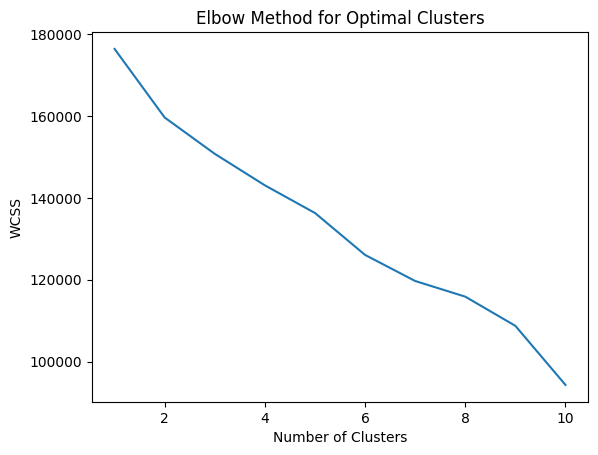

In [83]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(train_df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

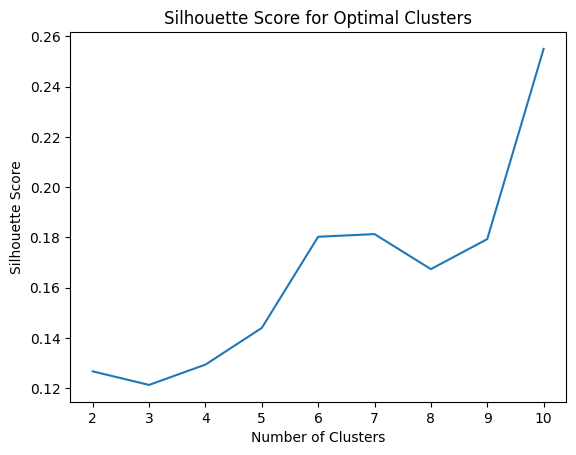

In [84]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(train_df_scaled)
    silhouette_scores.append(silhouette_score(train_df_scaled, kmeans.labels_))

plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Clusters')
plt.show()

In [93]:
import numpy as np
kmeans = KMeans(n_clusters=4, random_state=42)
train_df['Segmentation'] = kmeans.fit_predict(train_df_scaled)

label_mapping = {0: 'A', 1: 'B', 2: 'C', 3: 'D'}

train_df['Segmentation'] = train_df['Segmentation'].map(label_mapping)

In [94]:
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

In [95]:
cluster_centers_df = pd.DataFrame(cluster_centers, columns=train_df.columns.drop('Segmentation'))
print(cluster_centers_df)

     Gender  Ever_Married        Age  Graduated  Work_Experience  \
0  0.365763      0.986441  56.464068   0.779322         1.926733   
1  0.472745      0.549058  38.663033   0.378593         2.343525   
2  0.545797      0.344516  37.607991   0.648700         3.520460   
3  0.423841      0.107852  26.786187   0.388836         2.676253   

   Spending_Score  Family_Size  Profession_Artist  Profession_Doctor  \
0        1.090169     2.697188           0.494576       2.711864e-02   
1        0.469772     3.488127           0.192270       1.010902e-01   
2        0.152657     2.476347           0.299661       1.831888e-01   
3        0.075686     3.585902           0.000946      -1.942890e-16   

   Profession_Engineer  ...  Profession_Homemaker  Profession_Lawyer  \
0         3.966102e-02  ...          6.440678e-03           0.189492   
1         1.932607e-01  ...          2.576809e-02           0.027750   
2         1.364493e-01  ...          7.124011e-02           0.003769   
3         

In [98]:
train_df.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation,Profession_Artist,Profession_Doctor,...,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,0,0,22,0,1.000000,0,4.0,B,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,1,38,1,2.636206,1,3.0,B,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,1,67,1,1.000000,0,1.0,A,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,67,1,0.000000,2,2.0,A,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,1,40,1,2.636206,2,6.0,A,0,0,...,0,0,0,0,0,0,0,0,1,0


# Visualization

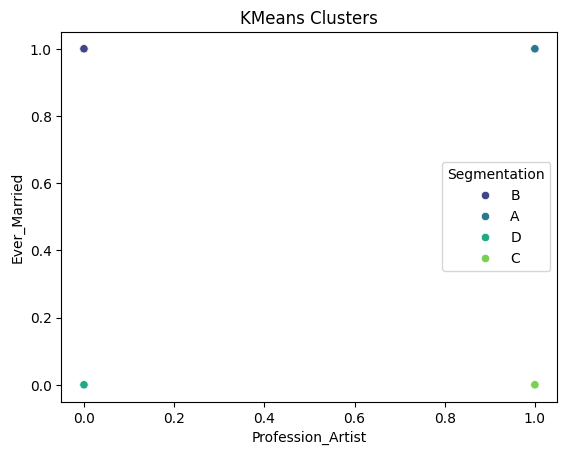

In [99]:
sns.scatterplot(data=train_df, x='Profession_Artist', y='Ever_Married', hue='Segmentation', palette='viridis')
plt.title('KMeans Clusters')
plt.show()

**Test Prediction**

In [100]:
test_df_encoded = test_df.copy()

test_df_encoded['Gender'] = test_df_encoded['Gender'].map({'Male': 0, 'Female': 1})
test_df_encoded['Ever_Married'] = test_df_encoded['Ever_Married'].map({'No': 0, 'Yes': 1})
test_df_encoded['Graduated'] = test_df_encoded['Graduated'].map({'No': 0, 'Yes': 1})
test_df_encoded['Spending_Score'] = test_df_encoded['Spending_Score'].map({'Low': 0, 'Average': 1, 'High': 2})

test_df_encoded = pd.get_dummies(test_df_encoded, columns=['Profession', 'Var_1'])

test_df_scaled = scaler.transform(test_df_encoded)

In [101]:
test_clusters = kmeans.predict(test_df_scaled)
test_clusters_labeled = pd.Series(test_clusters).map(label_mapping)
test_df['Segmentation'] = test_clusters_labeled

**Visualization**

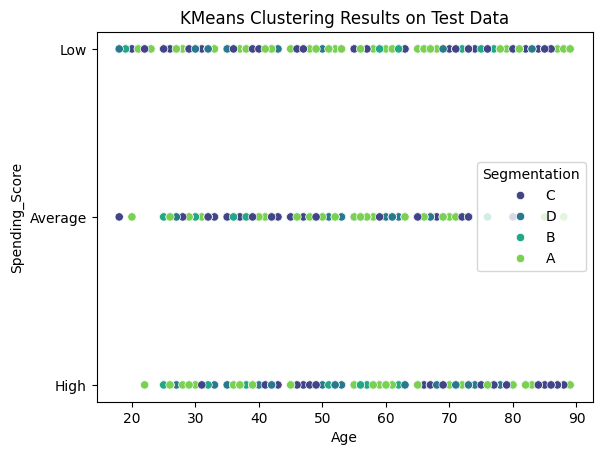

In [105]:
sns.scatterplot(data=test_df, x='Age', y='Spending_Score', hue='Segmentation', palette='viridis')
plt.title('KMeans Clustering Results on Test Data')
plt.show()

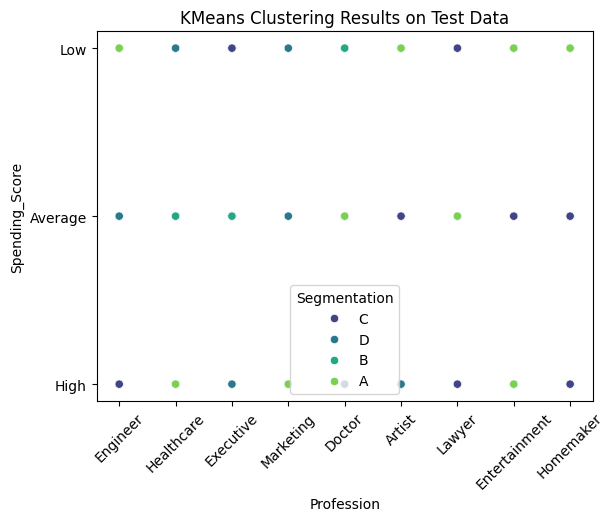

In [108]:
plt.xticks(rotation=45)
sns.scatterplot(data=test_df, x='Profession', y='Spending_Score', hue='Segmentation', palette='viridis')
plt.title('KMeans Clustering Results on Test Data')
plt.show()

In [109]:
print(f"Inertia: {kmeans.inertia_}")

Inertia: 143059.39464281805


In [118]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(train_df_scaled, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.12945274379040633


It looks like our clusters is well defined and not overlapped despite the high intertia and low silhoutte score

# Hierarchical Clustering

In [119]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4)
clusters = model.fit_predict(train_df_scaled)

**Evaluation and Prediction**

In [129]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_columns = train_df.columns

scaler.fit(train_df_scaled)
test_df_encoded = test_df.copy()

test_df_encoded['Gender'] = test_df_encoded['Gender'].map({'Male': 0, 'Female': 1})
test_df_encoded['Ever_Married'] = test_df_encoded['Ever_Married'].map({'No': 0, 'Yes': 1})
test_df_encoded['Graduated'] = test_df_encoded['Graduated'].map({'No': 0, 'Yes': 1})
test_df_encoded['Spending_Score'] = test_df_encoded['Spending_Score'].map({'Low': 0, 'Average': 1, 'High': 2})

numerical_columns = train_df.select_dtypes(include=['number']).columns

test_df_encoded = test_df_encoded.reindex(columns=numerical_columns, fill_value=0)

test_df_scaled = scaler.transform(test_df_encoded)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



In [130]:
hierarchical = AgglomerativeClustering(n_clusters=4)
train_clusters = hierarchical.fit_predict(train_df_scaled)
test_clusters_hierarchical = hierarchical.fit_predict(test_df_scaled)
test_df['Cluster_Hierarchical'] = test_clusters_hierarchical

In [131]:
test_df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Cluster_Hierarchical
0,Female,Yes,36,Yes,Engineer,0.000000,Low,1.0,Cat_6,C,0
1,Male,Yes,37,Yes,Healthcare,8.000000,Average,4.0,Cat_6,D,0
3,Male,Yes,59,No,Executive,11.000000,High,2.0,Cat_6,C,1
4,Female,No,19,No,Marketing,2.636206,Low,4.0,Cat_6,B,2
5,Male,Yes,47,Yes,Doctor,0.000000,High,5.0,Cat_4,C,0


In [132]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(test_df_scaled, test_clusters_hierarchical)
print(f"Silhouette Score (Hierarchical): {silhouette_avg}")

Silhouette Score (Hierarchical): 0.46916413261242235


Silhoutte Score is better then kmean score.

# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

In [120]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.5, min_samples=5)
clusters = model.fit_predict(train_df_scaled)

In [133]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(train_df_scaled)
test_clusters_dbscan = dbscan.fit_predict(test_df_scaled)
test_df['Cluster_DBSCAN'] = test_clusters_dbscan

In [134]:
test_df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Cluster_Hierarchical,Cluster_DBSCAN
0,Female,Yes,36,Yes,Engineer,0.000000,Low,1.0,Cat_6,C,0,-1
1,Male,Yes,37,Yes,Healthcare,8.000000,Average,4.0,Cat_6,D,0,-1
3,Male,Yes,59,No,Executive,11.000000,High,2.0,Cat_6,C,1,-1
4,Female,No,19,No,Marketing,2.636206,Low,4.0,Cat_6,B,2,-1
5,Male,Yes,47,Yes,Doctor,0.000000,High,5.0,Cat_4,C,0,-1


In [135]:
silhouette_avg = silhouette_score(test_df_scaled, test_clusters_dbscan)
print(f"Silhouette Score (DBSCAN): {silhouette_avg}")

Silhouette Score (DBSCAN): -0.4521558501283139


# Spectral Clustering

In [136]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', random_state=42)
clusters = model.fit_predict(train_df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



In [138]:
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import NearestNeighbors

spectral = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', random_state=42)
train_clusters_spectral = spectral.fit_predict(train_df_scaled)

nn = NearestNeighbors(n_neighbors=1)
nn.fit(train_df_scaled)
distances, indices = nn.kneighbors(test_df_scaled)
test_clusters_spectral = train_clusters_spectral[indices[:, 0]]

test_df['Cluster_Spectral'] = test_clusters_spectral

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



In [139]:
silhouette_avg = silhouette_score(test_df_scaled, test_clusters_spectral)
print(f"Silhouette Score (Spectral): {silhouette_avg}")

Silhouette Score (Spectral): 0.025480480722709056


# Visualization

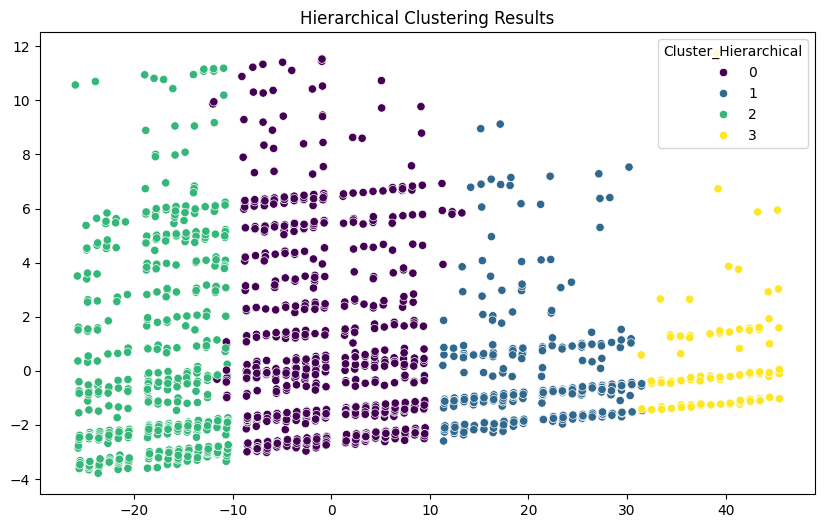

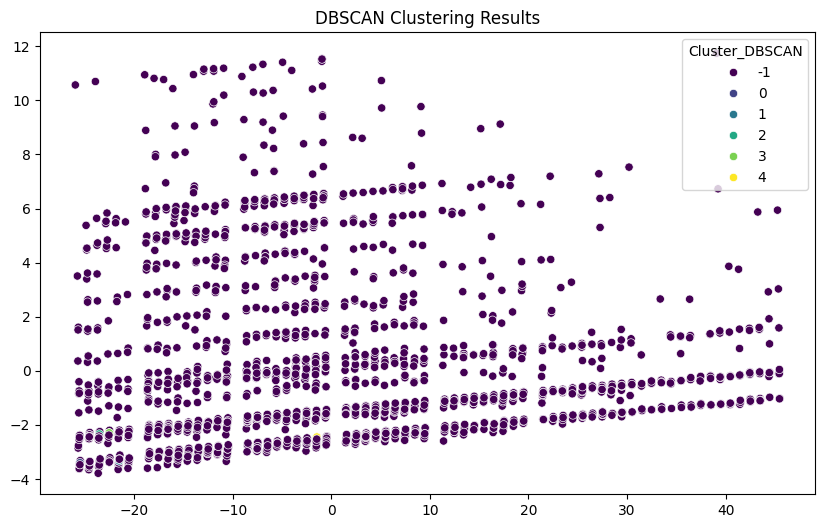

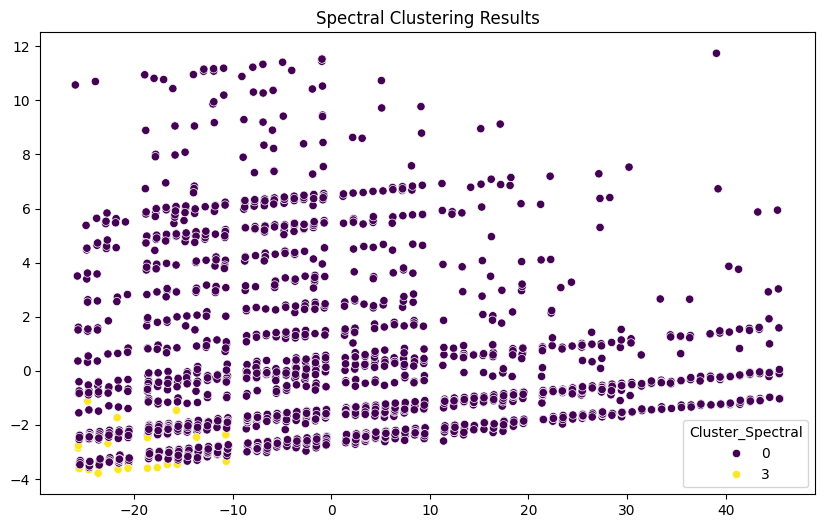

In [140]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
train_pca = pca.fit_transform(test_df_scaled)

# Visualize Hierarchical Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_pca[:, 0], y=train_pca[:, 1], hue=test_df['Cluster_Hierarchical'], palette='viridis')
plt.title('Hierarchical Clustering Results')
plt.show()

# Visualize DBSCAN
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_pca[:, 0], y=train_pca[:, 1], hue=test_df['Cluster_DBSCAN'], palette='viridis')
plt.title('DBSCAN Clustering Results')
plt.show()

# Visualize Spectral Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_pca[:, 0], y=train_pca[:, 1], hue=test_df['Cluster_Spectral'], palette='viridis')
plt.title('Spectral Clustering Results')
plt.show()


Hierarcical Clustering performs better then the rest of the models. but before that let's try and tune paramters for DBSCAN.

# Hyperparamter Tuning: DBSCAN

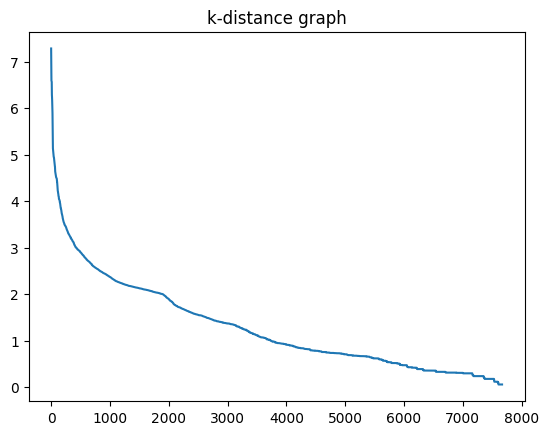

In [142]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

neighbors = NearestNeighbors(n_neighbors=10)
neighbors_fit = neighbors.fit(train_df_scaled)
distances, indices = neighbors_fit.kneighbors(train_df_scaled)

distances = sorted(distances[:, -1], reverse=True)
plt.plot(distances)
plt.title("k-distance graph")
plt.show()

In [147]:
dbscan = DBSCAN(eps=0.5, min_samples=1)
dbscan.fit(train_df_scaled)
test_clusters_dbscan = dbscan.fit_predict(test_df_scaled)
test_df['Cluster_DBSCAN'] = test_clusters_dbscan
silhouette_avg = silhouette_score(test_df_scaled, test_clusters_dbscan)
print(f"Silhouette Score (DBSCAN): {silhouette_avg}")

Silhouette Score (DBSCAN): 0.2420516871279758


In [166]:
dbscan = DBSCAN(eps=5, min_samples=6)
dbscan.fit(train_df_scaled)
test_clusters_dbscan = dbscan.fit_predict(test_df_scaled)
test_df['Cluster_DBSCAN'] = test_clusters_dbscan
silhouette_avg = silhouette_score(test_df_scaled, test_clusters_dbscan)
print(f"Silhouette Score (DBSCAN): {silhouette_avg}")

Silhouette Score (DBSCAN): 0.339212410835909


Silouette scored improved after changing paramters. However it is still not as good as Hierarchical Clustering.  

# Final Model: Hierarcical Clustering

In [174]:
train_df.columns

Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Work_Experience',
       'Spending_Score', 'Family_Size', 'Segmentation', 'Profession_Artist',
       'Profession_Doctor', 'Profession_Engineer', 'Profession_Entertainment',
       'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker',
       'Profession_Lawyer', 'Profession_Marketing', 'Var_1_Cat_1',
       'Var_1_Cat_2', 'Var_1_Cat_3', 'Var_1_Cat_4', 'Var_1_Cat_5',
       'Var_1_Cat_6', 'Var_1_Cat_7'],
      dtype='object')

In [178]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances

new_data = {
    'Gender': [1],  # Male
    'Ever_Married': [1],  # Yes
    'Age': [20],
    'Graduated': [0],  # Yes
    'Work_Experience': [2],  # 5 years of experience
    'Spending_Score': [0],  # Low
    'Family_Size': [1],
    'Profession_Artist': [1],
    'Profession_Doctor': [0],
    'Profession_Engineer': [0],  # Engineer
    'Profession_Entertainment': [0],
    'Profession_Executive': [0],
    'Profession_Healthcare': [0],
    'Profession_Homemaker': [0],
    'Profession_Lawyer': [0],
    'Profession_Marketing': [0],
    'Var_1_Cat_1': [1],
    'Var_1_Cat_2': [0],
    'Var_1_Cat_3': [0],
    'Var_1_Cat_4': [0],
    'Var_1_Cat_5': [0],
    'Var_1_Cat_6': [0],
    'Var_1_Cat_7': [0]
}

new_data_df = pd.DataFrame(new_data)

scaler = StandardScaler()
new_data_scaled = scaler.fit_transform(new_data_df)

model = AgglomerativeClustering(n_clusters=4)
train_clusters = model.fit_predict(train_df_scaled)

centroids = []
for cluster_id in range(model.n_clusters):
    cluster_points = train_df_scaled[train_clusters == cluster_id]
    centroid = np.mean(cluster_points, axis=0)
    centroids.append(centroid)

centroids = np.array(centroids)

distances = euclidean_distances(new_data_scaled, centroids)

predicted_cluster = np.argmin(distances, axis=1)

print(f"Predicted cluster for new data point: {predicted_cluster[0]}")

Predicted cluster for new data point: 0
